# Computer Vision 7th Mini-Project

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Table of Contents :

I. Importing Libraries

II. Dataset Reading

III. Tradtional Feature Extraction Techniques (LBP,SIFT,ORB)

IV. Deep Learning-based Feature Extraction Techniques (VGG16)

V. Feature Combination & Dimensionality Reduction

# Chapter I : Imported LIbraries

Here we Used the following :

- OpenCV for image capture

- OS for file access

- NumPy for array manipulation

- sci-kit image for intitating feature extraction

- TensorFlow for implementing VGG16 and performing feature extraction

- Sci-kit Learn decompostion for Pricinpal Component Analysis

In [2]:
#Importing The Following Libraries
import cv2
import os
import numpy as np
from skimage import feature
from skimage.feature import local_binary_pattern
from skimage import exposure
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from matplotlib import pyplot as plt

# Chapter II : Dataset Reading

In order to read all the images, we need to make a nested FOR loop in which the program loops over each folder of the 41 folders and looping over the 120 images of each folder. a tuple titled 'all_images' is made to store all the images captured by OpenCV's imreaf function.

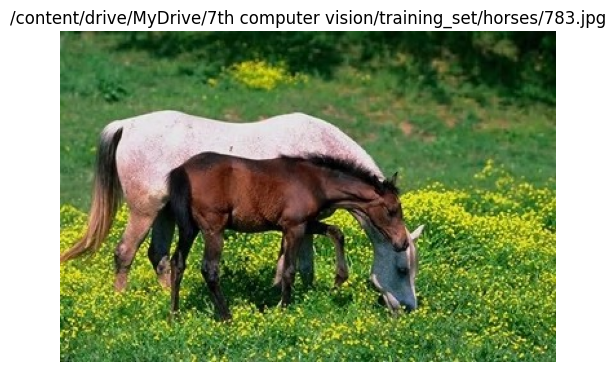

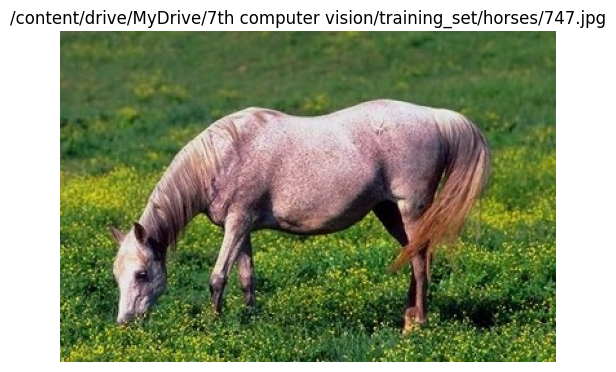

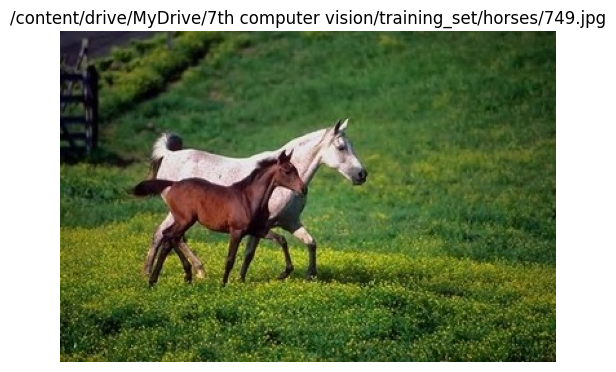

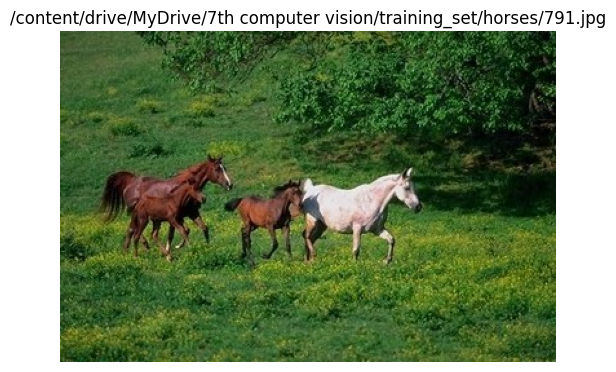

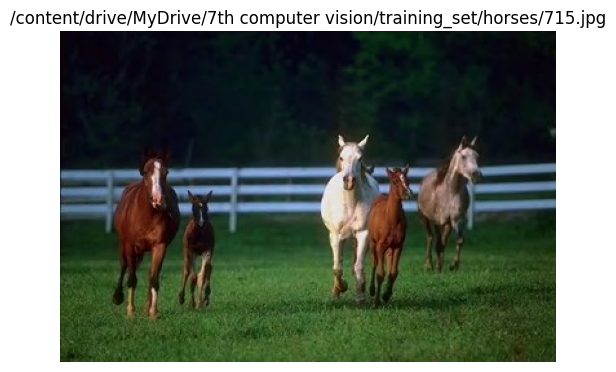

In [3]:
import glob
import matplotlib.pyplot as plt
import cv2

# Replace the path with your Google Drive path
path = '/content/drive/MyDrive/7th computer vision/training_set/*/*'

# Use glob to read all image paths
all_images = glob.glob(path)

# Display the first few images as a check
for img_path in all_images[:5]:  # Limit to first 5 for demonstration
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert color format for proper display

    # Display image
    plt.imshow(image)
    plt.title(img_path)
    plt.axis('off')
    plt.show()



In [4]:
print(len(all_images))

900


# Chapter III : Tradtional Feature Extraction Techniques

Here, the following procedures are as follows:

- Creating a function for each extraction techniques

- Creating a new tuple for each extraction technique in order to store the extracted features

- A FOR loop is made in all_images to ensure that every image has its features extracted

In [5]:
def extract_lbp_features(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)

    # Ensure the image is not None (i.e., it was read successfully)
    if image is None:
        print(f"Warning: Image at {image_path} could not be read.")
        return None

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Extract LBP features (parameters: P=8, R=1 are typical settings)
    lbp = feature.local_binary_pattern(gray_image, P=8, R=1, method='uniform')

    return lbp

# Process the images
lbp_features_list = []
for img in all_images:
    lbp_features = extract_lbp_features(img)
    if lbp_features is not None:
        lbp_features_list.append(lbp_features)

In [6]:
def extract_sift_features(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)

    # Ensure the image is not None (i.e., it was read successfully)
    if image is None:
        print(f"Warning: Image at {image_path} could not be read.")
        return None

    # Convert to grayscale as SIFT requires single-channel images
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Initialize SIFT
    sift = cv2.SIFT_create()

    # Detect and compute SIFT keypoints and descriptors
    keypoints, sift_descriptors = sift.detectAndCompute(gray_image, None)

    return sift_descriptors

# Process the images
sift_features_list = []
for img in all_images:
    sift_descriptors = extract_sift_features(img)
    if sift_descriptors is not None:
        sift_features_list.append(sift_descriptors)

In [7]:
import cv2

# Define the function to extract ORB features
def extract_orb_features(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)

    # Ensure the image is not None (i.e., it was read successfully)
    if image is None:
        print(f"Warning: Image at {image_path} could not be read.")
        return None

    # Convert to grayscale as ORB requires single-channel images
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Initialize ORB
    orb = cv2.ORB_create()

    # Detect and compute ORB keypoints and descriptors
    keypoints, orb_descriptors = orb.detectAndCompute(gray_image, None)

    return orb_descriptors

# Process the images
orb_features_list = []
for img in all_images:
    orb_descriptors = extract_orb_features(img)
    if orb_descriptors is not None:
        orb_features_list.append(orb_descriptors)


In [8]:
#Creating a Tuple for Each Feature Extraction Process
lbp_features_list = []
sift_features_list = []
#hog_features_list = []
orb_features_list = []

In [9]:
#Intiate Linear Binary Patterns (24:22)
for img in all_images:
    lbp_features = extract_lbp_features(img)
    lbp_features_list.append(lbp_features)

In [10]:
#Intiate Scale-Invariant Feature Transform (17:39)
for img in all_images:
    sift_descriptors = extract_sift_features(img)
    sift_features_list.append(sift_descriptors)

In [11]:
#Intiate Oriented FAST and Rotated BRIEF (3:22)
for img in all_images:
    orb_descriptors = extract_orb_features(img)
    orb_features_list.append(orb_descriptors)

In [12]:
import numpy as np

def pad_features(features_list, max_rows=None, max_cols=None):
    # Determine the maximum rows and columns
    if max_rows is None:
        max_rows = max(features.shape[0] for features in features_list if features is not None)
    if max_cols is None:
        max_cols = max(features.shape[1] if len(features.shape) > 1 else 1 for features in features_list if features is not None)

    padded_list = []
    for features in features_list:
        if features is not None:
            # Pad each feature array to match max_rows and max_cols
            padded_features = np.zeros((max_rows, max_cols))
            if len(features.shape) > 1:
                padded_features[:features.shape[0], :features.shape[1]] = features
            else:
                padded_features[:features.shape[0], :1] = features[:, None]  # Convert 1D to 2D if needed
            padded_list.append(padded_features)
        else:
            # Handle None by creating an array of zeros
            padded_list.append(np.zeros((max_rows, max_cols)))

    return np.array(padded_list)

# Apply padding to the lists
lbp_features_list = pad_features(lbp_features_list)
sift_features_list = pad_features(sift_features_list)
orb_features_list = pad_features(orb_features_list)


# Chapter IV : Deep Learning-based Feature Extraction Techniques

In [13]:
#VGG16 Function
def load_and_preprocess_image_vgg16(img):
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    image = preprocess_input(image)
    return image


In [14]:
#Storing the features in a tuple
vgg16_features = []

In [15]:
#Pre-Trained VGG16 Model
vgg16_model = VGG16(weights='imagenet', include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [16]:
from tensorflow.keras.applications.vgg16 import preprocess_input
import cv2

# VGG16 Function
def load_and_preprocess_image_vgg16(img_path):
    # Read the image using OpenCV
    image = cv2.imread(img_path)

    # Ensure the image was read successfully
    if image is None:
        print(f"Warning: Image at {img_path} could not be read.")
        return None

    # Convert the image from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Resize the image to 224x224 for VGG16 input
    image = cv2.resize(image, (224, 224))

    # Preprocess the image for VGG16
    image = preprocess_input(image)

    return image

# Process images using the modified function
vgg16_features = []
for img in all_images:
    image_vgg16 = load_and_preprocess_image_vgg16(img)
    if image_vgg16 is not None:
        vgg16_feature = vgg16_model.predict(np.expand_dims(image_vgg16, axis=0))
        vgg16_features.append(vgg16_feature)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 863ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 864ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 849ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 839ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 948ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

# Chapter V : Feature Combination & Dimensionality Reduction

To combine 2 features in one, we converted them to numpy arrays for easy managment, then we flatten them to make sure they have the same shape to avoid errors. then combine them using numpy's concatenate

In [17]:
#Converting Deep Features to numpy arrays
vgg16_features = np.array(vgg16_features)

In [18]:
#Flattening Features to same size in order to be combined
Corb_features = orb_features_list.flatten()
Cvgg16_features = vgg16_features.flatten()

In [19]:
#Combination of VGG16 and ORB Features
combined_features = np.concatenate([Cvgg16_features, Corb_features])

In [20]:
print(combined_features)

[0. 0. 0. ... 0. 0. 0.]


For Dimensionality Reduction using Pricinpal Component Analysis (PCA), We Apply the following:

In [21]:
# Ensure all feature arrays are 1D before applying PCA
lbp_features_list = [features if features.ndim == 1 else features.flatten() for features in lbp_features_list]
lbp_features_list = np.array(lbp_features_list)

# Apply PCA on the 2D array
n_components = min(lbp_features_list.shape[1], 100)
pca = PCA(n_components=2)
lbp_features_pca = pca.fit_transform(lbp_features_list)


In [22]:
print(lbp_features_pca)

[[ 184.14612006 -174.05029783]
 [ 194.3980834  -164.55112449]
 [ 191.73548341 -176.70043585]
 ...
 [ 152.83909271 -203.85310147]
 [ 193.30951537 -114.05564801]
 [ 297.51517325  -37.54783657]]


In [23]:
print("Shape of combined_features:", combined_features.shape)


Shape of combined_features: (36864000,)


In [24]:
if len(combined_features.shape) == 1:
    combined_features = combined_features.reshape(1, -1)


In [25]:
n_components = min(combined_features.shape[1], 1)
pca = PCA(n_components=n_components)
combined_pca = pca.fit_transform(combined_features)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py:591: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


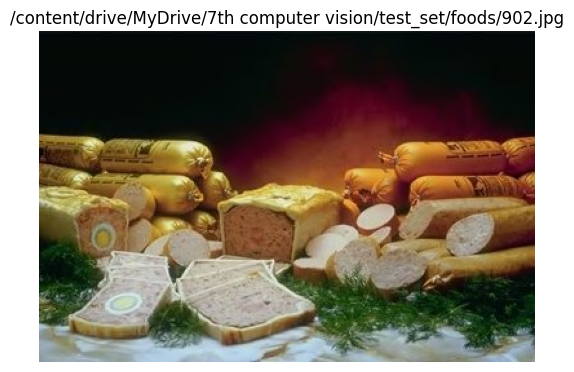

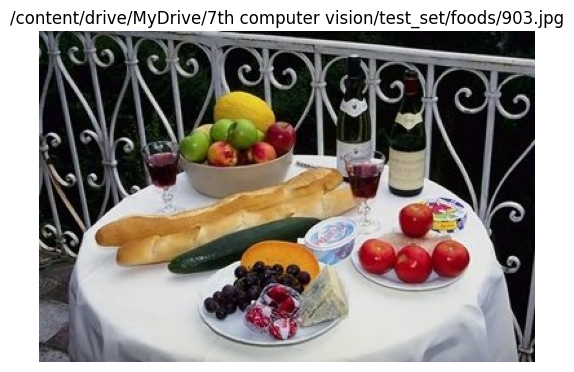

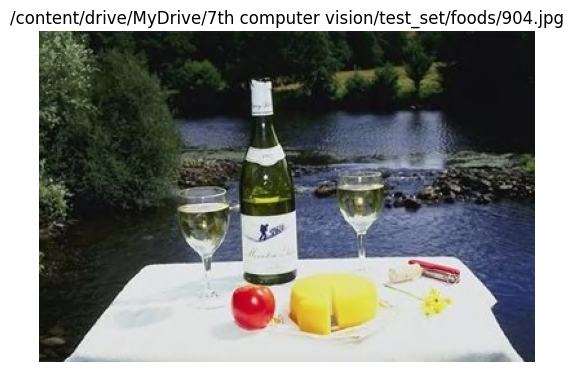

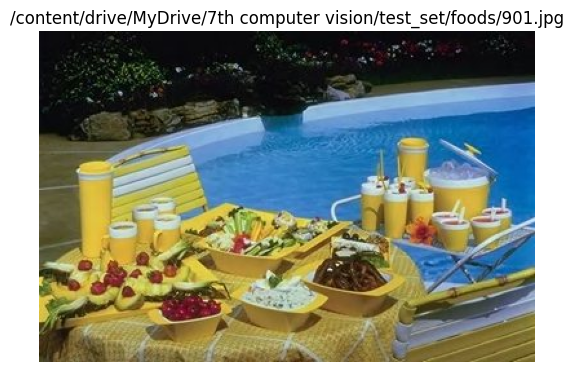

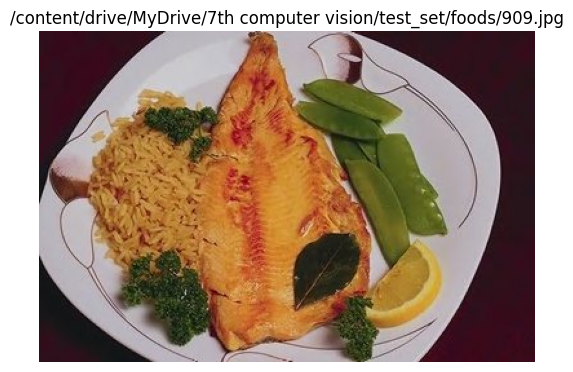

In [26]:
import glob
import matplotlib.pyplot as plt
import cv2

# Replace the path with your Google Drive path
path_test = '/content/drive/MyDrive/7th computer vision/test_set/*/*'

# Use glob to read all image paths
all_images_test = glob.glob(path_test)

# Display the first few images as a check
for img_path_test in all_images_test[:5]:  # Limit to first 5 for demonstration
    image_test = cv2.imread(img_path_test)
    image_test = cv2.cvtColor(image_test, cv2.COLOR_BGR2RGB)  # Convert color format for proper display

    # Display image
    plt.imshow(image_test)
    plt.title(img_path_test)
    plt.axis('off')
    plt.show()



In [27]:
print(len(all_images_test))

100


In [28]:
def extract_lbp_features_test(image_path_test):
    # Read the image using OpenCV
    image_test = cv2.imread(image_path_test)

    # Ensure the image is not None (i.e., it was read successfully)
    if image_test is None:
        print(f"Warning: Image at {image_path_test} could not be read.")
        return None

    # Convert to grayscale
    gray_image_test = cv2.cvtColor(image_test, cv2.COLOR_BGR2GRAY)

    # Extract LBP features (parameters: P=8, R=1 are typical settings)
    lbp_test = feature.local_binary_pattern(gray_image_test, P=8, R=1, method='uniform')

    return lbp_test

# Process the images
lbp_features_list_test = []
for img_test in all_images_test:
    lbp_features_test = extract_lbp_features(img_test)
    if lbp_features_test is not None:
        lbp_features_list_test.append(lbp_features_test)

In [29]:
lbp_features_list_test = []
#Intiate Linear Binary Patterns (24:22)
for img_test in all_images_test:
    lbp_features_test = extract_lbp_features_test(img_test)
    lbp_features_list_test.append(lbp_features_test)

In [30]:
len(lbp_features_list_test)

100

In [31]:
import numpy as np

def pad_features_test(features_list_test, max_rows=None, max_cols=None):
    # Determine the maximum rows and columns
    if max_rows is None:
        max_rows = max(features.shape[0] for features in features_list_test if features is not None)
    if max_cols is None:
        max_cols = max(features.shape[1] if len(features.shape) > 1 else 1 for features in features_list_test if features is not None)

    padded_list = []
    for features in features_list_test:
        if features is not None:
            # Pad each feature array to match max_rows and max_cols
            padded_features = np.zeros((max_rows, max_cols))
            if len(features.shape) > 1:
                padded_features[:features.shape[0], :features.shape[1]] = features
            else:
                padded_features[:features.shape[0], :1] = features[:, None]  # Convert 1D to 2D if needed
            padded_list.append(padded_features)
        else:
            # Handle None by creating an array of zeros
            padded_list.append(np.zeros((max_rows, max_cols)))

    return np.array(padded_list)

# Apply padding to the lists
lbp_features_list_test = pad_features(lbp_features_list_test)

In [32]:
len(lbp_features_list_test)

100

In [33]:
# Ensure all feature arrays are 1D before applying PCA
lbp_features_list_test = [features if features.ndim == 1 else features.flatten() for features in lbp_features_list_test]
lbp_features_list_test = np.array(lbp_features_list_test)

# Apply PCA on the 2D array
n_components = min(lbp_features_list_test.shape[1], 100)
pca = PCA(n_components=2)
lbp_features_pca_test = pca.fit_transform(lbp_features_list_test)

In [34]:
print(lbp_features_pca_test)

[[-260.24570134  185.24806036]
 [-211.10932078 -137.90470933]
 [-261.50805083  -90.2617123 ]
 [-200.27812993  -84.48810427]
 [-342.37482678   30.34725165]
 [-206.64213634  -99.37021604]
 [-194.80660836 -107.34411338]
 [1063.35524363  -65.65887601]
 [-175.62517864 -163.61113737]
 [1087.60699855  -16.47669932]
 [1088.16613665   99.96544681]
 [-228.41744408  -63.74097523]
 [-208.7736547   -96.50876394]
 [-180.30238909 -107.23727802]
 [1075.97393899   42.01184921]
 [-300.29639431   52.90121217]
 [1113.3428505   221.63579929]
 [-220.24747797   -8.03329621]
 [-302.33523285   64.62553104]
 [-266.30808191  143.91587949]
 [-387.2632721    26.77639745]
 [-388.1676893    90.24946844]
 [-197.27714645  -68.0360829 ]
 [-308.16683782  103.52839705]
 [-238.864536    -62.85762104]
 [-138.8459669  -142.92631725]
 [-255.37681574 -171.9274342 ]
 [-194.55652161  -81.83607364]
 [-271.38819122  -42.35322419]
 [-154.9872439  -162.41803228]
 [1069.97398197  112.78390152]
 [-221.3589599   -77.94624979]
 [-282.9

In [35]:
print(len(lbp_features_pca_test))

100
